In [1]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_curve, f1_score, roc_curve, roc_auc_score
from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import Binarizer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import titanic

In [2]:
titanic_df = pd.read_csv('train_titanic.csv')
y_titanic_df = titanic_df['Survived']
x_titanic_df = titanic_df.drop('Survived', axis=1)
x_titanic_df = titanic.transform_features(x_titanic_df)
x_train, x_test, y_train, y_test = train_test_split(x_titanic_df, y_titanic_df)

### 정확도

In [3]:
myclf = titanic.MyDummyClassifier()
myclf.fit(x_train, y_train)
pred = myclf.predict(x_test)

print(accuracy_score(y_test, pred))

0.7623318385650224


In [4]:
digits = load_digits()
y = (digits.target==7).astype(int)
x_train, x_test, y_train, y_test = train_test_split(digits.data, y)

In [5]:
fakeclf = titanic.MyFakeClassifier()
fakeclf.fit(x_train, y_train)
pred = fakeclf.predict(x_test)

print(accuracy_score(y_test, pred))

0.9155555555555556


### 오차행렬

In [6]:
confusion_matrix(y_test, pred)

array([[412,   0],
       [ 38,   0]])

### 정밀도와 재현율

In [7]:
titanic_df = pd.read_csv('train_titanic.csv')
y_titanic_df = titanic_df['Survived']
x_titanic_df = titanic_df.drop('Survived', axis=1)
x_titanic_df = titanic.transform_features(x_titanic_df)
x_train, x_test, y_train, y_test = train_test_split(x_titanic_df, y_titanic_df)

lr = LogisticRegression(solver='liblinear')
lr.fit(x_train, y_train)
pred = lr.predict(x_test)
accuracy, precision, recall = titanic.get_clf_eval(y_test, pred)

print(f'acc:accuracy:.3f prec:{precision:.3f} recall:{recall:.3f}')

acc:accuracy:.3f prec:0.753 recall:0.679


In [8]:
pred_proba = lr.predict_proba(x_test)
pred = lr.predict(x_test)

In [9]:
pred_proba.shape, pred.shape

((223, 2), (223,))

In [10]:
pred_proba[0], pred[0]

(array([0.87387835, 0.12612165]), 0)

In [11]:
x = [[1,2,1], [4,0,2], [1,2,3]]
binar = Binarizer(threshold=2)
binar.fit_transform(x)

array([[0, 0, 0],
       [1, 0, 0],
       [0, 0, 1]])

In [12]:
pp1 = pred_proba[:,1].reshape(-1,1)
pp1[:3]

array([[0.12612165],
       [0.64672368],
       [0.12587354]])

In [13]:
binar = Binarizer(threshold=0.5)
pv = binar.fit_transform(pp1)
titanic.get_clf_eval(y_test, pv)

(0.8026905829596412, 0.7534246575342466, 0.6790123456790124)

In [14]:
titanic.get_clf_eval(y_test, pred)

(0.8026905829596412, 0.7534246575342466, 0.6790123456790124)

In [15]:
binar = Binarizer(threshold=0.4)
pv = binar.fit_transform(pp1)
titanic.get_clf_eval(y_test, pv)

(0.7847533632286996, 0.6853932584269663, 0.7530864197530864)

In [16]:
tvs = np.arange(0.4, 0.61, 0.05)
titanic.get_eval_by_thresholds(y_test, pp1, tvs)

acc:0.785 prec:0.685 recall:0.753
acc:0.789 prec:0.713 recall:0.704
acc:0.803 prec:0.753 recall:0.679
acc:0.807 prec:0.771 recall:0.667
acc:0.798 prec:0.790 recall:0.605


In [17]:
prec, rec, thres = precision_recall_curve(y_test, pp1)
thres.shape

(184,)

In [18]:
thr_index = np.arange(0, thres.shape[0], 15)
thr_index

array([  0,  15,  30,  45,  60,  75,  90, 105, 120, 135, 150, 165, 180])

In [19]:
print(np.round(thres[thr_index], 2))

[0.02 0.1  0.13 0.13 0.17 0.28 0.37 0.42 0.56 0.63 0.74 0.78 0.94]


In [20]:
print(f'정밀도: {np.round(prec[thr_index], 2)}')
print(f'재현율: {np.round(rec[thr_index], 2)}')

정밀도: [0.36 0.38 0.4  0.44 0.55 0.62 0.65 0.71 0.78 0.85 0.89 0.95 1.  ]
재현율: [1.   0.96 0.94 0.94 0.89 0.86 0.79 0.73 0.65 0.54 0.4  0.22 0.05]


#### 그래프

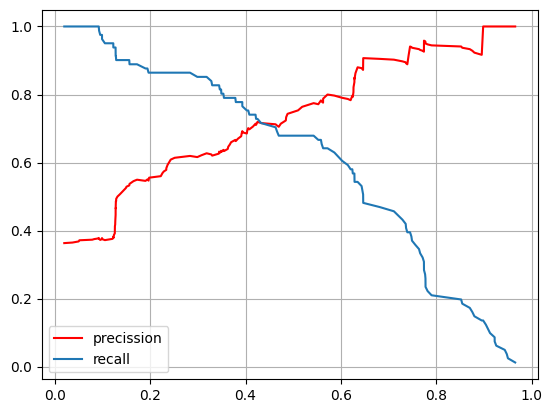

In [21]:
last = thres.shape[0]
plt.plot(thres, prec[0:last], 'r-', label='precission')
plt.plot(thres, rec[0:last], label='recall')
plt.grid()
plt.legend()
plt.show()

### F1 스코어

In [22]:
f1 = f1_score(y_test, pred)
print(f'F1 score: {f1:.4f}')

F1 score: 0.7143


In [23]:
thresholds = [0.4, 0.45, 0.5, 0.55, 0.55, 0.6]
pred_proba = lr.predict_proba(x_test)
pp1 = pred_proba[:,1].reshape(-1,1)
titanic.get_eval_by_thresholds_f1(y_test, pp1, thresholds)

오차 행렬
 [[114  28]
 [ 20  61]]
정확도:0.7848 정밀도:0.6854 재현율:0.7531 F1:0.7176
오차 행렬
 [[119  23]
 [ 24  57]]
정확도:0.7892 정밀도:0.7125 재현율:0.7037 F1:0.7081
오차 행렬
 [[124  18]
 [ 26  55]]
정확도:0.8027 정밀도:0.7534 재현율:0.6790 F1:0.7143
오차 행렬
 [[126  16]
 [ 27  54]]
정확도:0.8072 정밀도:0.7714 재현율:0.6667 F1:0.7152
오차 행렬
 [[126  16]
 [ 27  54]]
정확도:0.8072 정밀도:0.7714 재현율:0.6667 F1:0.7152
오차 행렬
 [[129  13]
 [ 32  49]]
정확도:0.7982 정밀도:0.7903 재현율:0.6049 F1:0.6853


### ROC 곡선과 AUC

In [24]:
pred_proba = lr.predict_proba(x_test)
pp1 = pred_proba[:,1].reshape(-1,1)
fprs, tprs, thresholds = roc_curve(y_test, pp1)
thr_index = np.arange(1, thresholds.shape[0], 5)
print(f'인덱스: {thr_index}')
print(f'임계값: {np.round(thresholds[thr_index], 2)}')
print(f'FRP: {np.round(fprs[thr_index], 2)}')
print(f'TRP: {np.round(tprs[thr_index], 2)}')

인덱스: [ 1  6 11 16 21 26 31 36 41 46 51 56 61 66 71 76]
임계값: [0.97 0.74 0.65 0.62 0.56 0.42 0.39 0.35 0.32 0.23 0.19 0.15 0.13 0.13
 0.12 0.1 ]
FRP: [0.   0.01 0.04 0.08 0.11 0.17 0.2  0.27 0.29 0.35 0.42 0.46 0.6  0.77
 0.87 0.94]
TRP: [0.01 0.4  0.51 0.57 0.67 0.73 0.78 0.8  0.85 0.86 0.88 0.9  0.91 0.94
 0.94 0.98]


#### 그래프 그리기

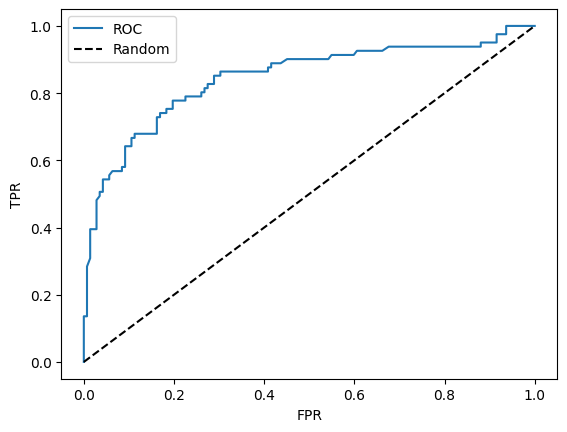

In [25]:
titanic.roc_curve_plot(y_test, pp1)

In [26]:
roc_auc_score(y_test, pp1)

0.8450704225352111